In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(1, '/Users/chris/Documents/PhD/ProjectSigma/GalaxyTools')

from HM2SM import halo_mass_to_stellar_mass
from VelocityDispersionLibrary import DM_profile, CumulativeMass
from Bernardi import bernardi_sigma 

from colossus.cosmology import cosmology
from colossus.halo import profile_nfw, profile_hernquist


In [2]:
HM = 12.0

r = np.logspace(0, 5)


res = DM_profile(r, HM, 0.0, "NFW", cpath = "/Users/chris/Documents/PhD/ProjectSigma/data/cM_planck18.txt")



In [3]:
cosmo = cosmology.setCosmology('planck18')

h = cosmo.h

p_nfw = profile_nfw.NFWProfile(M = 10**HM * h, c = 7.83391, z = 0.0, mdef = 'vir')
params = p_nfw.getParameterArray()

rhos = params[0] * (h**2)
rs = params[1]

print(rhos, np.log10(rhos))
print(rs, rs/h)


1618011.0883435735 6.208981493537024
22.761629585444865 33.64119063766607


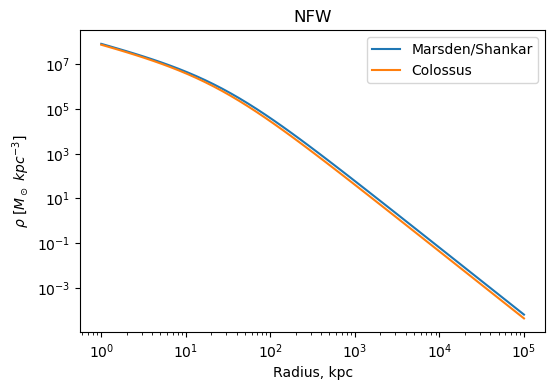

In [4]:
plt.figure(dpi=100)
#plt.plot(r/26.58, res/10**6.51556)
plt.plot(r, res, label = "Marsden/Shankar")

plt.plot(r, p_nfw.rho(rhos, r/rs)/(h**2), label = "Colossus")

plt.xlabel("Radius, kpc")
plt.ylabel(r"$\rho$ [$M_\odot$ $kpc^{-3}]$")

plt.title("NFW")

plt.legend()
plt.loglog()
plt.show()

In [11]:
r = np.linspace(1, 10, 10000)

Mass = CumulativeMass(r, np.ones_like(r)*0.0001, np.ones_like(r)*3.2, 
                      np.ones_like(r)*3.23, np.ones_like(r) * 11.1, 0.0, 
                      DM = "NFW", HaloMass = np.ones_like(r)*12.0, 
                      cpath = "/Users/chris/Documents/PhD/ProjectSigma/data/cM_planck18.txt", 
                      flag = 0)



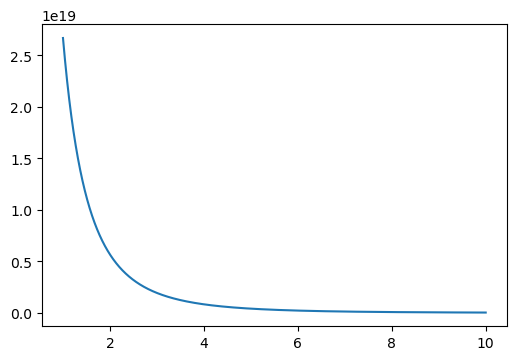

In [12]:
plt.figure(dpi=100)

plt.plot(r, Mass)

#plt.loglog()

plt.show()